<a href="https://colab.research.google.com/github/Ritesh1126/Deep-Learning/blob/main/overfitting%20and%20underfitting%20issues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#generating Synthetic Sample dataset

import numpy as np

np.random.seed(20)
n_sample = 30
true_function = lambda X: np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_sample))  # Random samples sorted in ascending order
y = true_function(X) + np.random.randn(n_sample) * 0.1

print("Generate X :")
display(X)
print("Generate y : ")
display(y)




Generate X :


array([0.03588959, 0.03666431, 0.11669374, 0.17878052, 0.19385022,
       0.23921822, 0.25480601, 0.2723164 , 0.37868094, 0.4610394 ,
       0.49238104, 0.49794007, 0.51851095, 0.56168686, 0.5881308 ,
       0.63125307, 0.65795147, 0.69175758, 0.71860593, 0.7512807 ,
       0.77025193, 0.77524489, 0.78300361, 0.81583748, 0.83949792,
       0.85032764, 0.85762553, 0.89153073, 0.89771373, 0.94977903])

Generate y : 


array([ 1.09774553,  1.11838906,  0.82823963,  0.65260849,  0.60007887,
        0.58472848,  0.37454107,  0.07689491, -0.30062217, -0.67658564,
       -0.58798229, -0.49422576, -0.8595153 , -1.0414075 , -0.87958726,
       -1.14121745, -0.96619544, -1.10667066, -1.00404505, -0.88945609,
       -0.94344028, -0.7174587 , -0.78874758, -0.70361613, -0.64246747,
       -0.51249433, -0.50125875, -0.35400043, -0.41421977, -0.50489431])

In [28]:
from sklearn.model_selection import train_test_split

# Suppose X and y are your data arrays
# X can be a 1D array or 2D array (features), y is target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 24
Test size: 6


In [29]:
#defining degree of polynomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit model on training data (X_train reshaped if needed)
model.fit(X_train.reshape(-1, 1), y_train)

# Predict
y_pred = model.predict(X_test.reshape(-1, 1))


In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.002639558813490942


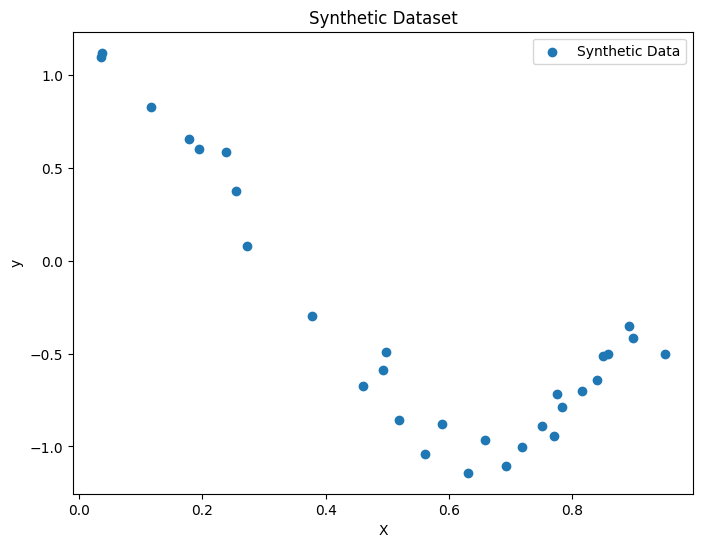

In [32]:
import matplotlib.pyplot as plt

# Create a scatter plot of the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Dataset")
plt.legend()
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train.reshape(-1, 1), y_train)

# Print the model's coefficients
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [-2.05576312]
Intercept: 0.8324178228781716


In [34]:
# Make predictions on the training and testing data
y_train_pred = linear_model.predict(X_train.reshape(-1, 1))
y_test_pred = linear_model.predict(X_test.reshape(-1, 1))

# Print the first 5 predictions for each set
print("Training predictions:", y_train_pred[:5])
print("Testing predictions:", y_test_pred[:5])

Training predictions: [-1.01306895 -0.89339105 -0.23351786  0.75863734  0.43390769]
Testing predictions: [-1.00035817 -0.46528895 -0.84475078 -0.5896719   0.05393951]


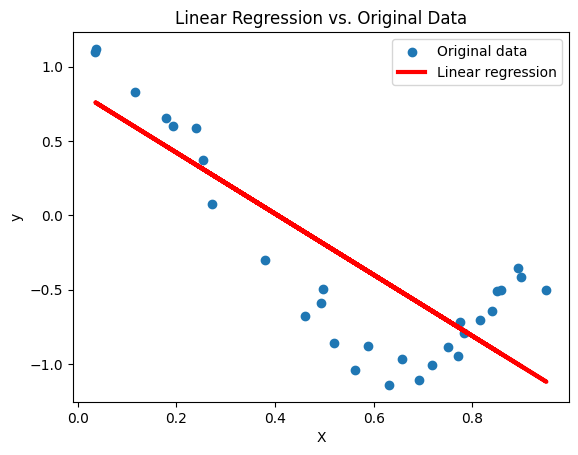

In [36]:
import matplotlib.pyplot as plt

# Create a scatter plot of the original data
plt.scatter(X, y, label="Original data")

# Plot the predictions of the linear regression model
plt.plot(X_train, y_train_pred, color="red", linewidth=3, label="Linear regression")

# Add labels and a title to the plot
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression vs. Original Data")
plt.legend()

# Show the plot
plt.show()

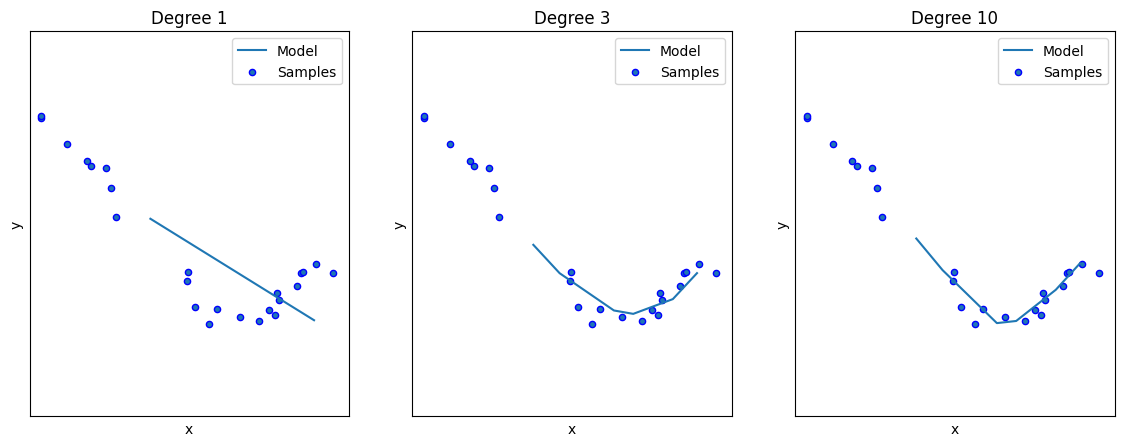

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

degrees = [1, 3, 10]
plt.figure(figsize=(14, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial_features, linear_regression)
    pipeline.fit(X_train.reshape(-1, 1), y_train)

    X_test_sorted = np.sort(X_test)
    y_pred = pipeline.predict(X_test_sorted.reshape(-1,1))

    plt.plot(X_test_sorted, y_pred, label="Model")
    plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degree}")

plt.show()